In [77]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [78]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

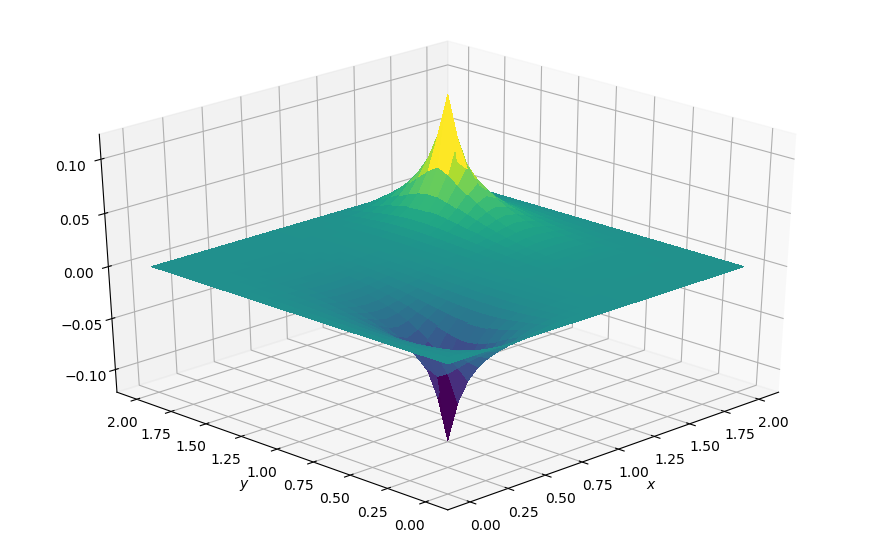

In [79]:
nt = 100
nx = 31
ny = 31
x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)
dx = 2/(nx-1)
dy = 1/(ny-1)
#I.C's
p = numpy.zeros((ny,nx))
b = numpy.zeros((ny,nx))
b[int(ny/4),int(nx/4)] = 100
b[int(3*ny/4),int(3*nx/4)] = -100
pn = numpy.empty_like(p)
for n in range (nt):
    pn = p.copy()
    p[1:-1,1:-1] = (dx**2*(pn[2:,1:-1]+pn[:-2,1:-1]) + dy**2*(pn[1:-1,2:]+pn[1:-1,:-2]) 
                    - b[1:-1,1:-1]*dx**2*dy**2)/(2*(dx**2+dy**2))  
    
    p[:,0] = 0
    p[:,-1] = 0
    p[0,:] = 0
    p[-1,:] = 0
plot2D(x, y, p)